<a href="https://colab.research.google.com/github/shushantarora009/MachineLearning/blob/main/feature_selection_using_roc_auc_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('dataset_2.csv')

In [11]:
df.head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109
0,4.532710,3.280834,17.982476,4.404259,2.349910,0.603264,2.784655,0.323146,12.009691,0.139346,...,2.079066,6.748819,2.941445,18.360496,17.726613,7.774031,1.473441,1.973832,0.976806,2.541417
1,5.821374,12.098722,13.309151,4.125599,1.045386,1.832035,1.833494,0.709090,8.652883,0.102757,...,2.479789,7.795290,3.557890,17.383378,15.193423,8.263673,1.878108,0.567939,1.018818,1.416433
2,1.938776,7.952752,0.972671,3.459267,1.935782,0.621463,2.338139,0.344948,9.937850,11.691283,...,1.861487,6.130886,3.401064,15.850471,14.620599,6.849776,1.098210,1.959183,1.575493,1.857893
3,6.020690,9.900544,17.869637,4.366715,1.973693,2.026012,2.853025,0.674847,11.816859,0.011151,...,1.340944,7.240058,2.417235,15.194609,13.553772,7.229971,0.835158,2.234482,0.946170,2.700606
4,3.909506,10.576516,0.934191,3.419572,1.871438,3.340811,1.868282,0.439865,13.585620,1.153366,...,2.738095,6.565509,4.341414,15.893832,11.929787,6.954033,1.853364,0.511027,2.599562,0.811364


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(['target'],axis=1),df['target'],random_state=0,test_size=0.2)

In [17]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape,type(X_train),type(y_train)

((468, 108),
 (117, 108),
 (468,),
 (117,),
 pandas.core.frame.DataFrame,
 pandas.core.series.Series)

In [15]:
from sklearn.metrics import roc_auc_score,mean_squared_error
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor

In [30]:
roc_values = []
for feature in X_train.columns:
  print(f'feature name{feature}')
  clf = DecisionTreeClassifier()
  clf.fit(X_train[feature].fillna(0).to_frame(),y_train)
  y_scored = clf.predict_proba(X_test[feature].dropna().to_frame())
  #print(f'y_scored: {y_scored}')
  #print(f'y_scored type: {type(y_scored)} y_test_type: {type(y_test)}')
  roc_values.append(roc_auc_score(y_test,y_scored[:,1]))
  


feature namevar_1
feature namevar_2
feature namevar_3
feature namevar_4
feature namevar_5
feature namevar_6
feature namevar_7
feature namevar_8
feature namevar_9
feature namevar_10
feature namevar_11
feature namevar_12
feature namevar_13
feature namevar_14
feature namevar_15
feature namevar_16
feature namevar_17
feature namevar_18
feature namevar_19
feature namevar_20
feature namevar_21
feature namevar_22
feature namevar_23
feature namevar_24
feature namevar_25
feature namevar_26
feature namevar_27
feature namevar_28
feature namevar_29
feature namevar_30
feature namevar_31
feature namevar_32
feature namevar_33
feature namevar_34
feature namevar_35
feature namevar_36
feature namevar_37
feature namevar_38
feature namevar_39
feature namevar_40
feature namevar_41
feature namevar_42
feature namevar_43
feature namevar_44
feature namevar_45
feature namevar_46
feature namevar_47
feature namevar_48
feature namevar_49
feature namevar_50
feature namevar_51
feature namevar_52
feature namevar_53
fe

In [23]:
roc_values[0:10]

[0.5181451612903226,
 0.43279569892473124,
 0.39650537634408606,
 0.5786290322580645,
 0.4180107526881721,
 0.4428763440860215,
 0.6377688172043012,
 0.5376344086021505,
 0.553763440860215,
 0.4899193548387097]

In [24]:
roc_values = pd.Series(roc_values)
roc_values.index = X_train.columns
roc_values

var_1      0.518145
var_2      0.432796
var_3      0.396505
var_4      0.578629
var_5      0.418011
             ...   
var_105    0.438844
var_106    0.533602
var_107    0.521505
var_108    0.554659
var_109    0.491263
Length: 108, dtype: float64

Text(0, 0.5, 'roc-auc')

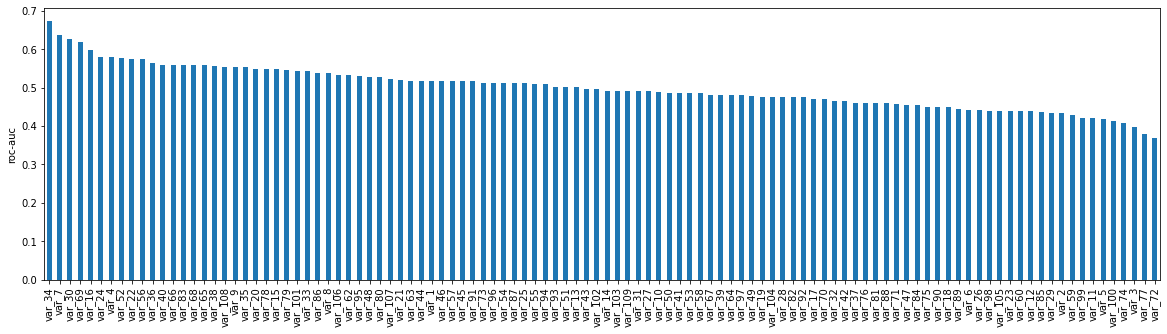

In [26]:
roc_values.sort_values(ascending=False).plot.bar(figsize=(20,5))
plt.ylabel('roc-auc')

In [27]:
len(roc_values[roc_values>0.5])

52

In [28]:
selected_features = roc_values[roc_values>0.5].index

In [29]:
selected_features

Index(['var_1', 'var_4', 'var_7', 'var_8', 'var_9', 'var_13', 'var_15',
       'var_16', 'var_20', 'var_21', 'var_22', 'var_24', 'var_25', 'var_30',
       'var_33', 'var_34', 'var_35', 'var_36', 'var_38', 'var_40', 'var_44',
       'var_45', 'var_46', 'var_48', 'var_51', 'var_52', 'var_54', 'var_55',
       'var_56', 'var_57', 'var_62', 'var_63', 'var_65', 'var_66', 'var_68',
       'var_69', 'var_73', 'var_78', 'var_79', 'var_80', 'var_83', 'var_86',
       'var_87', 'var_91', 'var_93', 'var_94', 'var_95', 'var_96', 'var_101',
       'var_106', 'var_107', 'var_108'],
      dtype='object')